In [2]:
# Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
from matplotlib.image import imread

import os

import cv2
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

#from sklearn.model_selection import train_test_split
#import random
#import os

In [2]:
# In this file we'll load the trained models in Dogs and Cats Classifier.ipynb file. The below code is for the model
# developed using transfer learning

In [4]:
# Make a prediction for a new image.

# Load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    
    # convert to array
    img = img_to_array(img)
    
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('dog.3.jpg')
    
    # load model
    model = load_model('Transfer Learning Model.h5')
    
    # predict the class
    result = model.predict(img)
    print(result)
    k = int(round(result[0]))
    if k == 0:
        print("The image is a 'cat'")
    elif k == 1:
        print("The image is a 'dog'")
    
# entry point, run the example
run_example()

[[4.320493e-06]]
The image is a 'cat'


In [6]:
# This below code gives us prediction for the VGG model with 3 blocks that achieved about 87% accuracy

In [3]:
# Make a prediction for a new image.

# Load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(200, 200))
    
    # convert to array
    img = img_to_array(img)
    
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 200, 200, 3)
    
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('cat.5.jpg')
    
    # load model
    model = load_model('3 Block VGG Model.h5')
    
    # predict the class
    result = model.predict(img)
    k = int(round(result[0]))
    if k == 0:
        print("The image is a 'cat'")
    elif k == 1:
        print("The image is a 'dog'")
    
# entry point, run the example
run_example()

The image is a 'cat'


In [7]:
# It seems the model is working fine. We'll now make predictions on our test dataset

In [8]:
test = 'test1/'

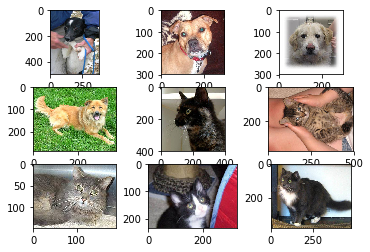

In [9]:
# Plotting first 9 photos from test dataset, we can also plot random images

for i in range(1, 10):
    pyplot.subplot(330 + i)   # Define subplot
    filename = test + str(i) + '.jpg'   # Define filename
    image = imread(filename)   # Load image pixels
    pyplot.imshow(image)   # Plot raw pixel data
pyplot.show()   # Show figure

# subplot is used to plot two or more plots in a single figure and 330 + i + 1 describes position of figure in 
# subplot

In [20]:
lst1 = []
for i in range(1, 12501):
    # Load and prepare the image
    def load_image(filename):
        # load the image
        img = load_img(filename, target_size=(224, 224))

        # convert to array
        img = img_to_array(img)

        # reshape into a single sample with 3 channels
        img = img.reshape(1, 224, 224, 3)

        # center pixel data
        img = img.astype('float32')
        img = img - [123.68, 116.779, 103.939]
        return img

    # load an image and predict the class
    def run_example():
        # load the image
        img = load_image(test + str(i) + '.jpg')

        # load model
        model = load_model('Transfer Learning Model.h5')

        # predict the class
        result = model.predict(img)
        k = int(round(result[0]))
        print(k)
        lst2 = [i, k]
        lst1.append(lst2)

    run_example()
df = pd.DataFrame(lst1, columns = ['id', 'label'])
filename = 'Predictions.csv'
df.to_csv(filename, index = False)

1
1
1
1
0
0
0
0
0
0
0


KeyboardInterrupt: 

In [10]:
# Executing this code was taking a lot of time and hence was stopped in between but the code is correct and can be
# easily executed.

In [11]:
# We can do the same thing with the 3 block VGG model. To do so, we replace Transfer Learning Model.h5 with the 3 
# block VGG model that is with 3 Block VGG Model.h5

In [12]:
# We'll now see how to take the images through a webcam and given the result. We'll use the library OpenCV for the
# same

In [31]:
cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

while True:
    ret, frame = cam.read()
    cv2.imshow("test", frame)
    if not ret:
        break
    k = cv2.waitKey(1)

    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    
    elif k%256 == 32:
        # SPACE pressed
        #img_name = "opencv_frame_{}.jpg".format(img_counter)
        img_name = "image.jpg"
        cv2.imwrite(img_name, frame)
        #print("{} written!".format(img_name))
        img_counter += 1
        break

cam.release()

cv2.destroyAllWindows()

# Load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    
    # convert to array
    img = img_to_array(img)
    
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('image.jpg')
    
    # load model
    model = load_model('Transfer Learning Model.h5')
    
    # predict the class
    result = model.predict(img)
    k = int(round(result[0]))
    if k == 0:
        print("The image is a 'cat'")
    elif k == 1:
        print("The image is a 'dog'")
    
# entry point, run the example
run_example()

#import os
#os.remove("image.jpg")

The image is a 'dog'


In [28]:
# Similar thing can be done for 3 block VGG model which is 3 Block VGG Model.h5 by replacing it with 'Transfer 
# Learning Model.h5'